In [40]:
import xarray as xr
import cmocean

In [41]:
#load the file
file = "/home/jovyan/shared_data/data/copernicus/OCEANCOLOUR_GLO_BGC_L3_MY_009_107/c3s_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D_multi-vars_27.98W-12.02W_8.02N-19.98N_1997-09-04-2024-01-31.zarr/"
ds_plankton = xr.open_zarr((file))

In [42]:
ds_plankton

<xarray.Dataset>
Dimensions:     (time: 9646, latitude: 288, longitude: 384)
Coordinates:
  * latitude    (latitude) float64 8.021 8.062 8.104 8.146 ... 19.9 19.94 19.98
  * longitude   (longitude) float64 -27.98 -27.94 -27.9 ... -12.1 -12.06 -12.02
  * time        (time) datetime64[ns] 1997-09-04 1997-09-05 ... 2024-01-31
Data variables:
    CHL         (time, latitude, longitude) float32 dask.array<chunksize=(1868, 16, 32), meta=np.ndarray>
    MICRO       (time, latitude, longitude) float32 dask.array<chunksize=(1868, 16, 32), meta=np.ndarray>
    MICRO_BIAS  (time, latitude, longitude) float32 dask.array<chunksize=(1868, 16, 32), meta=np.ndarray>
    MICRO_RMSE  (time, latitude, longitude) float32 dask.array<chunksize=(1868, 16, 32), meta=np.ndarray>
    NANO        (time, latitude, longitude) float32 dask.array<chunksize=(1868, 16, 32), meta=np.ndarray>
    NANO_BIAS   (time, latitude, longitude) float32 dask.array<chunksize=(1868, 16, 32), meta=np.ndarray>
    NANO_RMSE   (time, latitude, longitude) float32 dask.array<chunksize=(1868, 16, 32), meta=np.ndarray>
    PICO        (time, latitude, longitude) float32 dask.array<chunksize=(1868, 16, 32), meta=np.ndarray>
    PICO_BIAS   (time, latitude, longitude) float32 dask.array<chunksize=(1868, 16, 32), meta=np.ndarray>
    PICO_RMSE   (time, latitude, longitude) float32 dask.array<chunksize=(1868, 16, 32), meta=np.ndarray>
Attributes: (12/39)
    Conventions:               CF-1.7
    Creation_time:             08:52:33 UTC
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    Naming_authority:          CMEMS
    Netcdf_version_id:         V4
    citation:                  The licensees should respect the Copernicus Ma...
    ...                        ...
    start_time:                00:00:00 UTC
    stop_date:                 1997-09-04
    stop_time:                 23:59:00 UTC
    summary:                   Data products generated by the Ocean Colour co...
    title:                     c3s_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1M
    westernmost_longitude:     -180

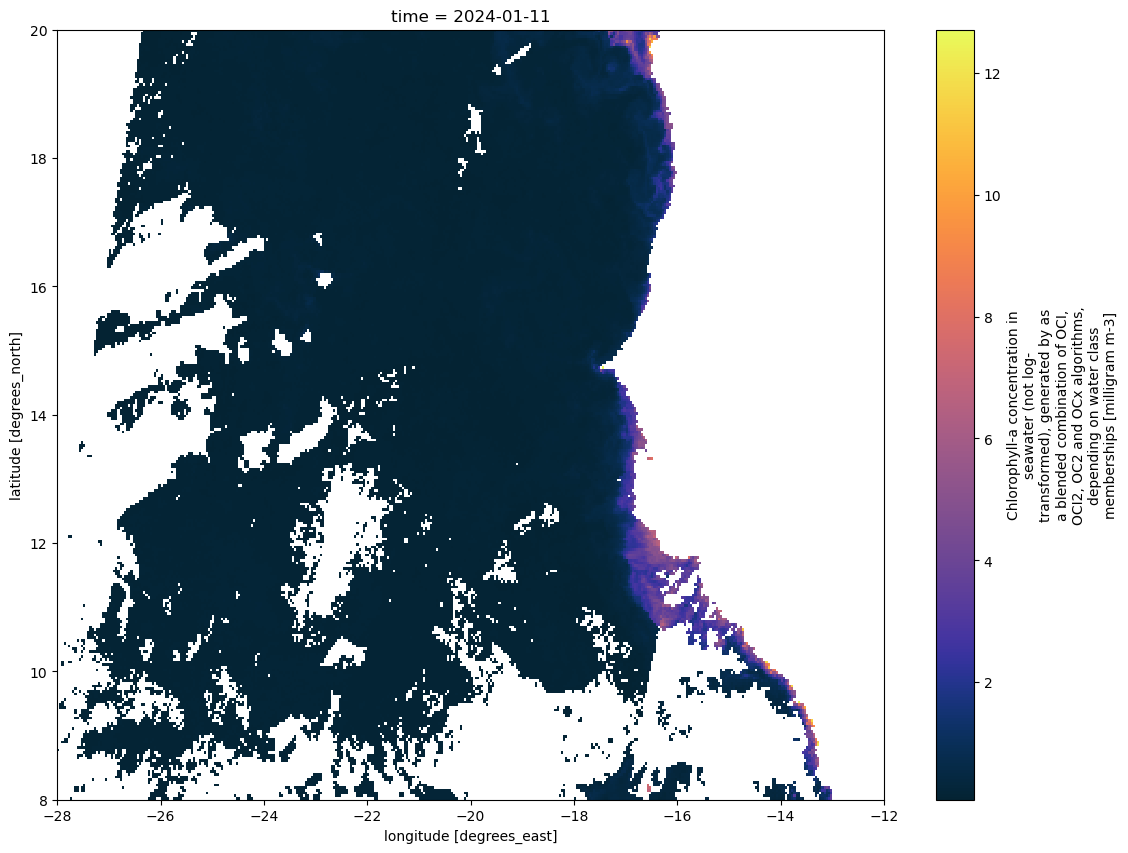

In [43]:
(
    ds_plankton
    #.sel(depth=slice(10, 50)).mean("depth")
    .sel(time="2024-01-11")#(time>="2024-01-09" and time<="2024-01-11").mean()
    .CHL
    .plot(
        x="longitude", y="latitude",
        cmap=cmocean.cm.thermal,
        size=10,
    )
)
ds_plankton = ds_plankton.sel(time = slice("2022-12-29",  "2024-01-30"))

In [44]:
# coarsen w.r.t time(average over every 5 days, to get over cloud cover)
ds_coarsen_time = ds_plankton.coarsen(time=5, boundary='pad').mean()
# coarse w.r.t space
ds_coarse = ds_coarsen_time.coarsen(longitude=3, latitude=3, boundary='pad').mean()

In [45]:
ds_coarse

<xarray.Dataset>
Dimensions:     (time: 80, latitude: 96, longitude: 128)
Coordinates:
  * latitude    (latitude) float64 8.063 8.188 8.313 8.438 ... 19.69 19.81 19.94
  * longitude   (longitude) float64 -27.94 -27.81 -27.69 ... -12.19 -12.06
  * time        (time) datetime64[ns] 2022-12-31 2023-01-05 ... 2024-01-29
Data variables:
    CHL         (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
    MICRO       (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
    MICRO_BIAS  (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
    MICRO_RMSE  (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
    NANO        (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
    NANO_BIAS   (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
    NANO_RMSE   (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
    PICO        (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
    PICO_BIAS   (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
    PICO_RMSE   (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
Attributes: (12/39)
    Conventions:               CF-1.7
    Creation_time:             08:52:33 UTC
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    Naming_authority:          CMEMS
    Netcdf_version_id:         V4
    citation:                  The licensees should respect the Copernicus Ma...
    ...                        ...
    start_time:                00:00:00 UTC
    stop_date:                 1997-09-04
    stop_time:                 23:59:00 UTC
    summary:                   Data products generated by the Ocean Colour co...
    title:                     c3s_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1M
    westernmost_longitude:     -180

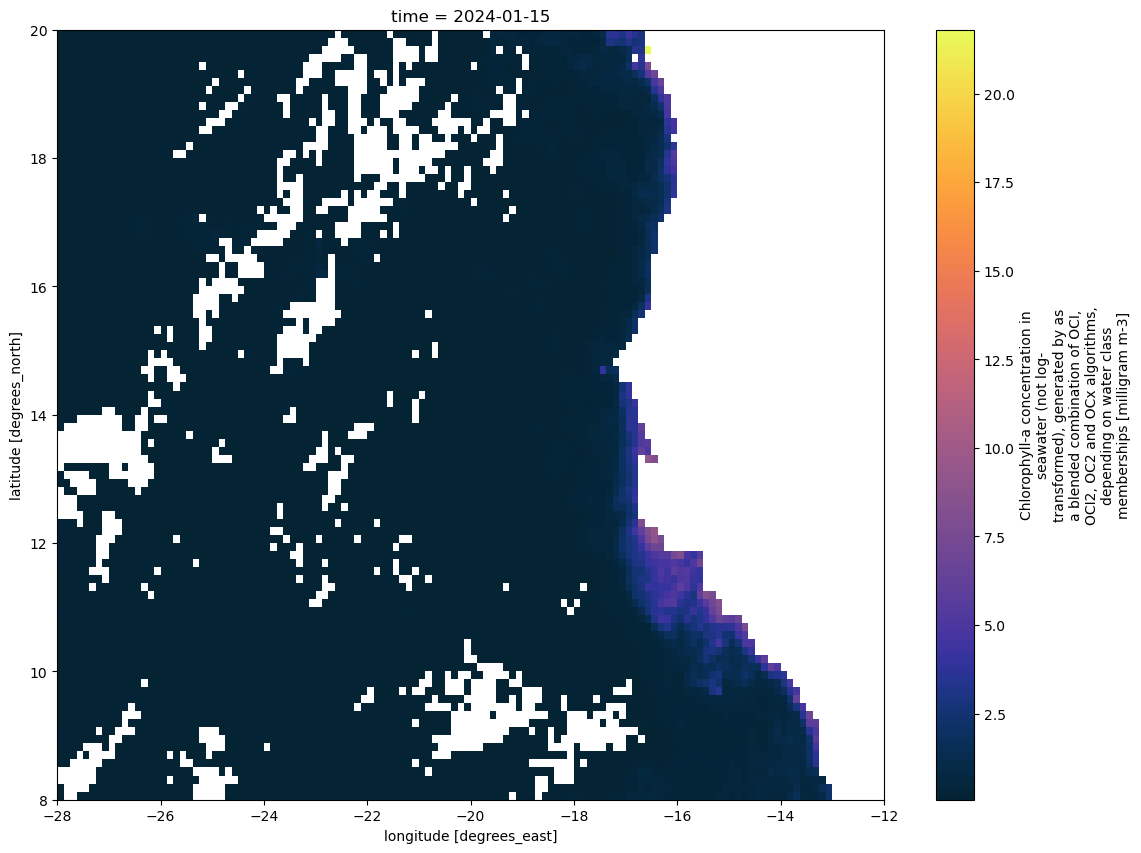

In [46]:
(
    ds_coarse
    .sel(time="2024-01-13", method = "nearest")
    .CHL
    .plot(
        x="longitude", y="latitude",
        cmap=cmocean.cm.thermal,
        size=10,
    )
)

In [47]:
file = "/home/jovyan/shared_data/data/copernicus/GLOBAL_MULTIYEAR_BGC_001_029/cmems_mod_glo_bgc_my_0.25_P1D-m_multi-vars_28.00W-12.00W_8.00N-20.00N_0.51-5902.06m_1993-01-01-2022-12-31.zarr/"
ds_bgc = xr.open_zarr((file))
ds_bgc

<xarray.Dataset>
Dimensions:    (time: 10957, depth: 75, latitude: 49, longitude: 65)
Coordinates:
  * depth      (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * latitude   (latitude) float32 8.0 8.25 8.5 8.75 ... 19.25 19.5 19.75 20.0
  * longitude  (longitude) float32 -28.0 -27.75 -27.5 ... -12.5 -12.25 -12.0
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2022-12-31
Data variables:
    chl        (time, depth, latitude, longitude) float32 dask.array<chunksize=(2045, 1, 16, 32), meta=np.ndarray>
    no3        (time, depth, latitude, longitude) float32 dask.array<chunksize=(2045, 1, 16, 32), meta=np.ndarray>
    nppv       (time, depth, latitude, longitude) float32 dask.array<chunksize=(2045, 1, 16, 32), meta=np.ndarray>
    o2         (time, depth, latitude, longitude) float32 dask.array<chunksize=(2045, 1, 16, 32), meta=np.ndarray>
    po4        (time, depth, latitude, longitude) float32 dask.array<chunksize=(2045, 1, 16, 32), meta=np.ndarray>
    si         (time, depth, latitude, longitude) float32 dask.array<chunksize=(2045, 1, 16, 32), meta=np.ndarray>
Attributes: (12/15)
    Conventions:                   CF-1.6
    area:                          GLOBAL
    contact:                       servicedesk.cmems@mercator-ocean.eu
    copernicusmarine_version:      1.0.3
    credit:                        E.U. Copernicus Marine Service Information...
    dataset:                       global-reanalysis-bio-001-029-daily
    ...                            ...
    product:                       GLOBAL_REANALYSIS_BIO_001_029
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    references:                    http://marine.copernicus.eu
    source:                        MERCATOR FREEBIORYS2V4
    title:                         Daily mean fields for product GLOBAL_REANA...

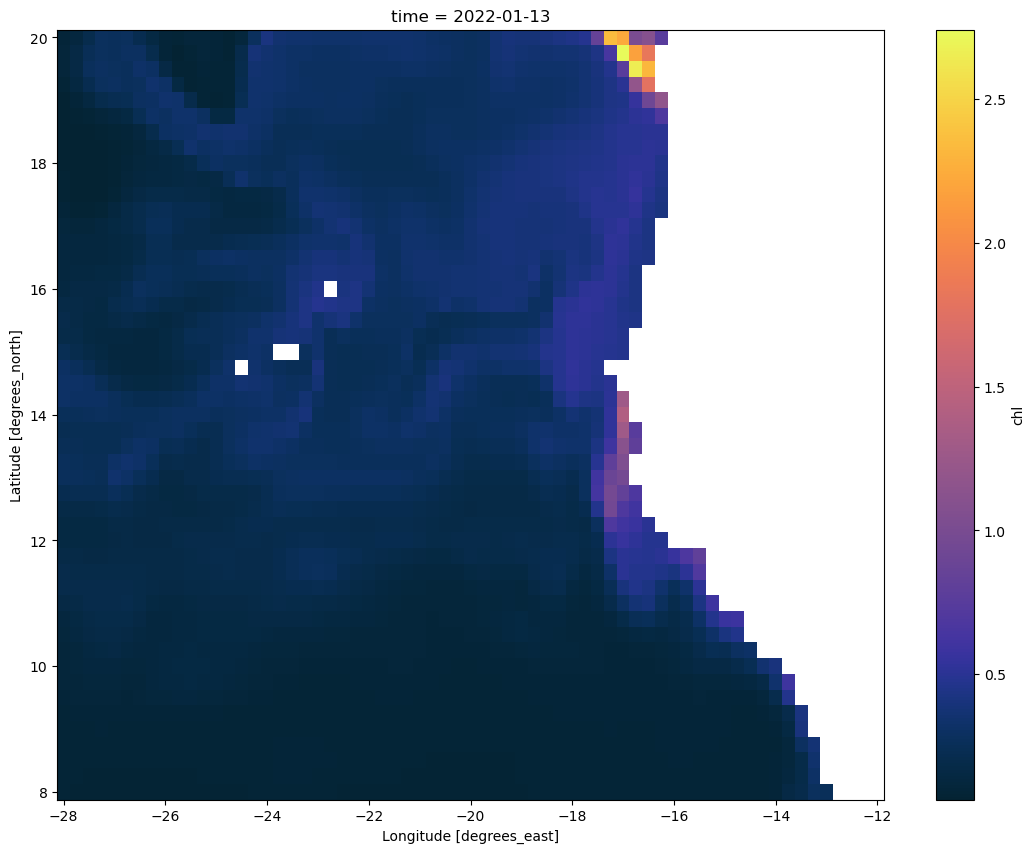

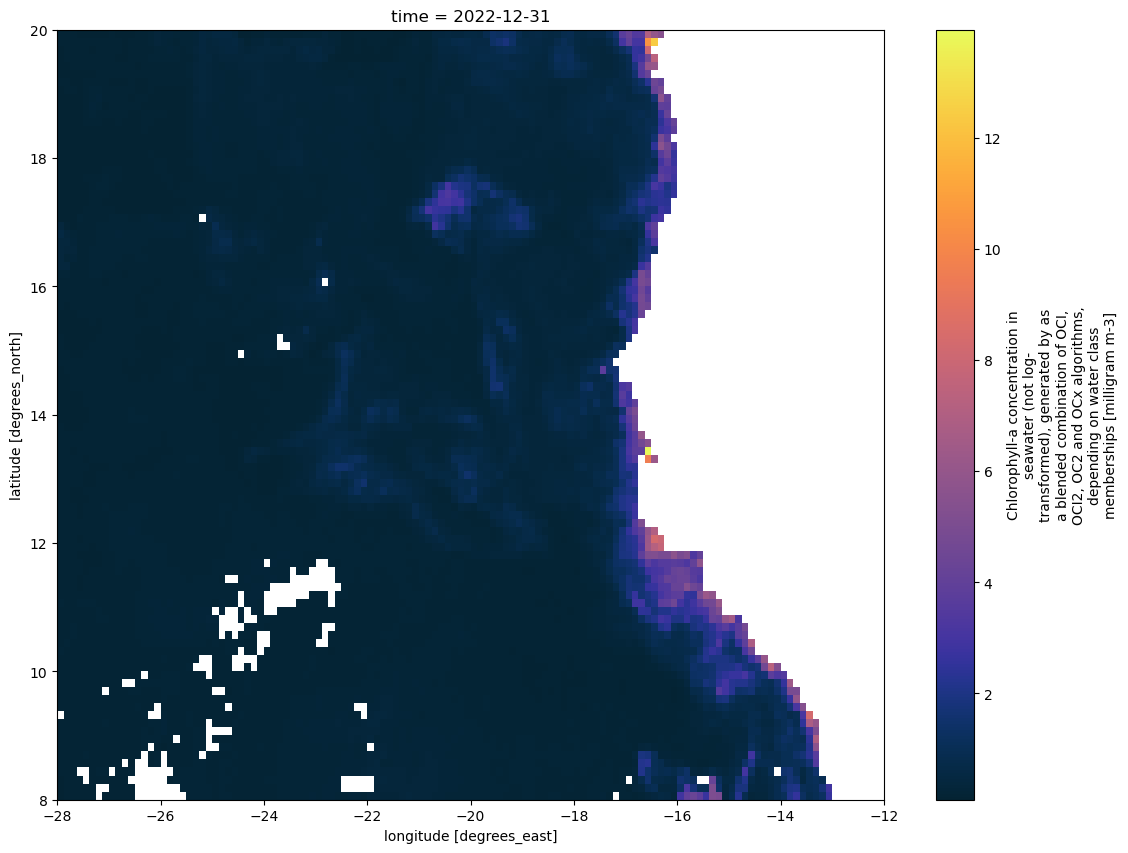

In [48]:
(
    ds_bgc
    .sel(depth=slice(0, 10)).mean("depth")
    .sel(time="2022-01-13")#(time>="2024-01-09" and time<="2024-01-11").mean()
    .chl
    .plot(
        x="longitude", y="latitude",
        cmap=cmocean.cm.thermal,
        size=10,
    )
)

(
    ds_coarse
    #.sel(depth=slice(10, 50)).mean("depth")
    .sel(time="2022-01-13", method = "nearest")#(time>="2024-01-09" and time<="2024-01-11").mean()
    .CHL
    .plot(
        x="longitude", y="latitude",
        cmap=cmocean.cm.thermal,
        size=10,
    )
)



In [49]:
ds_coarse

<xarray.Dataset>
Dimensions:     (time: 80, latitude: 96, longitude: 128)
Coordinates:
  * latitude    (latitude) float64 8.063 8.188 8.313 8.438 ... 19.69 19.81 19.94
  * longitude   (longitude) float64 -27.94 -27.81 -27.69 ... -12.19 -12.06
  * time        (time) datetime64[ns] 2022-12-31 2023-01-05 ... 2024-01-29
Data variables:
    CHL         (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
    MICRO       (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
    MICRO_BIAS  (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
    MICRO_RMSE  (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
    NANO        (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
    NANO_BIAS   (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
    NANO_RMSE   (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
    PICO        (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
    PICO_BIAS   (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
    PICO_RMSE   (time, latitude, longitude) float32 dask.array<chunksize=(18, 5, 10), meta=np.ndarray>
Attributes: (12/39)
    Conventions:               CF-1.7
    Creation_time:             08:52:33 UTC
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    Naming_authority:          CMEMS
    Netcdf_version_id:         V4
    citation:                  The licensees should respect the Copernicus Ma...
    ...                        ...
    start_time:                00:00:00 UTC
    stop_date:                 1997-09-04
    stop_time:                 23:59:00 UTC
    summary:                   Data products generated by the Ocean Colour co...
    title:                     c3s_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1M
    westernmost_longitude:     -180

In [51]:
ds_coarse.to_netcdf("ds_biochl.nc") 

In [ ]:
latitude_range = (11, 20)
longitude_range = (-28, -20)

# Plot the chlorophyll concentration within the defined bounding box
(
    ds_coarse
    #.sel(depth=slice(10, 50)).mean("depth")
    .sel(time="2024-01-15", method = "nearest")#(time>="2024-01-09" and time<="2024-01-11").mean()
    .sel(latitude=slice(*latitude_range), longitude=slice(*longitude_range))
    .CHL
    .plot(
        x="longitude", y="latitude",
        cmap=cmocean.cm.thermal,
        size=10,
    )
)


In [ ]:
import matplotlib.pyplot as plt
# Define the latitude and longitude range for Cape Verde

latitude_range = (11, 20)
longitude_range = (-28, -20)
time_range = ("2024-01-01", "2024-03-01")
capeverde_data = ds_coarse.sel(latitude=slice(*latitude_range), longitude=slice(*longitude_range))
capeverde_data = ds_coarse.sel(time = slice(*time_range))
spatial_mean = capeverde_data.mean(dim=['latitude', 'longitude'])

# Plot the spatial mean against time
spatial_mean.CHL.plot.line(x='time', color = "red")

# Add plot labels and title
plt.xlabel('Time')
plt.ylabel('CHL Spatial Mean')
plt.title('Spatial Mean of CHL for Cape Verde')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
data_mindelo = pd.read_csv("../excsl_Mardata_csv.csv")
data_mindelo

In [ ]:
max_lat = data_mindelo.iloc[0,2]
min_lat = data_mindelo.iloc[0,4]

In [ ]:
def plotTimeSeriesRegion(latitude_range, longitude_range, time_range, region_name):
    # Define the latitude and longitude range for Cape Verde
    plt.figure()
    ds_coarse_region = ds_coarse.sel(latitude=slice(*latitude_range), longitude=slice(*longitude_range))
    ds_coarse_region = ds_coarse_region.sel(time = slice(*time_range))
    spatial_mean = ds_coarse_region.mean(dim=['latitude', 'longitude'])
    
    # Plot the spatial mean against time
    spatial_mean.CHL.plot.line(x='time', color = "blue")
    
    # Add plot labels and title
    plt.xlabel('Time')
    plt.ylabel('CHL Spatial Mean')
    plt.title('Spatial Mean of CHL'+region_name)
    
    # Show the plot
    #plt.show()
    plt.gca().grid()
    (
    ds_coarse
    #.sel(depth=slice(10, 50)).mean("depth")
    .sel(time="2022-01-13", method = "nearest")#(time>="2024-01-09" and time<="2024-01-11").mean()
    .sel(latitude=slice(*latitude_range), longitude=slice(*longitude_range))
    .CHL
    .plot(
        x="longitude", y="latitude",
        cmap=cmocean.cm.thermal,
        size=10,
    )
    )
    

In [ ]:
for i in range(5):
    latitude_range = (data_mindelo.iloc[i,4], data_mindelo.iloc[i,2])
    print("Latitude range", latitude_range)
    print("Longitude range", longitude_range)
    longitude_range = (data_mindelo.iloc[i,3], data_mindelo.iloc[i,1])
    region_name = data_mindelo.iloc[i,0]
    time_range = ("2022-12-01", "2024-03-01")
    plotTimeSeriesRegion(latitude_range, longitude_range, time_range, region_name)

In [ ]:
ds_coarse

In [ ]:
"""
def plotTimeSeriesRegion(lat_range_north, long_range_north, time_range):
    # Define the latitude and longitude range for Cape Verde
plot.bar(lat_range_north, longitude_range, time_range)

capeverde_north = ds_coarse.sel(latitude=slice(*lat_range_north), longitude=slice(*long_range_north))
capeverde_north = ds_coarse.sel(time = slice(*time_range))
spatial_mean = capeverde_data.mean(dim=['latitude', 'longitude'])
plot.bar(latitude_range, long_range_north, time_range)

spatial_mean.CHL.plot.line(x='time', color = "blue")
    
    # Add plot labels and title
plt.xlabel('Time')
plt.ylabel('north')
plt.title('Spatial Mean of CHL for Cape Verde')
plot.bar(lat_range_north, longitude_range, time_range)
    # Show the plot
plt.show()
"""

In [ ]:
import pandas as pd
pd.DatetimeIndex(ds_coarse["time"]).year

In [25]:
ds_coarse

<xarray.Dataset>
Dimensions:     (time: 21, latitude: 96, longitude: 128)
Coordinates:
  * latitude    (latitude) float64 8.063 8.188 8.313 8.438 ... 19.69 19.81 19.94
  * longitude   (longitude) float64 -27.94 -27.81 -27.69 ... -12.19 -12.06
  * time        (time) datetime64[ns] 2023-10-12 2023-10-17 ... 2024-01-19
Data variables:
    CHL         (time, latitude, longitude) float32 dask.array<chunksize=(20, 5, 10), meta=np.ndarray>
    MICRO       (time, latitude, longitude) float32 dask.array<chunksize=(20, 5, 10), meta=np.ndarray>
    MICRO_BIAS  (time, latitude, longitude) float32 dask.array<chunksize=(20, 5, 10), meta=np.ndarray>
    MICRO_RMSE  (time, latitude, longitude) float32 dask.array<chunksize=(20, 5, 10), meta=np.ndarray>
    NANO        (time, latitude, longitude) float32 dask.array<chunksize=(20, 5, 10), meta=np.ndarray>
    NANO_BIAS   (time, latitude, longitude) float32 dask.array<chunksize=(20, 5, 10), meta=np.ndarray>
    NANO_RMSE   (time, latitude, longitude) float32 dask.array<chunksize=(20, 5, 10), meta=np.ndarray>
    PICO        (time, latitude, longitude) float32 dask.array<chunksize=(20, 5, 10), meta=np.ndarray>
    PICO_BIAS   (time, latitude, longitude) float32 dask.array<chunksize=(20, 5, 10), meta=np.ndarray>
    PICO_RMSE   (time, latitude, longitude) float32 dask.array<chunksize=(20, 5, 10), meta=np.ndarray>
Attributes: (12/39)
    Conventions:               CF-1.7
    Creation_time:             08:52:33 UTC
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    Naming_authority:          CMEMS
    Netcdf_version_id:         V4
    citation:                  The licensees should respect the Copernicus Ma...
    ...                        ...
    start_time:                00:00:00 UTC
    stop_date:                 1997-09-04
    stop_time:                 23:59:00 UTC
    summary:                   Data products generated by the Ocean Colour co...
    title:                     c3s_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1M
    westernmost_longitude:     -180

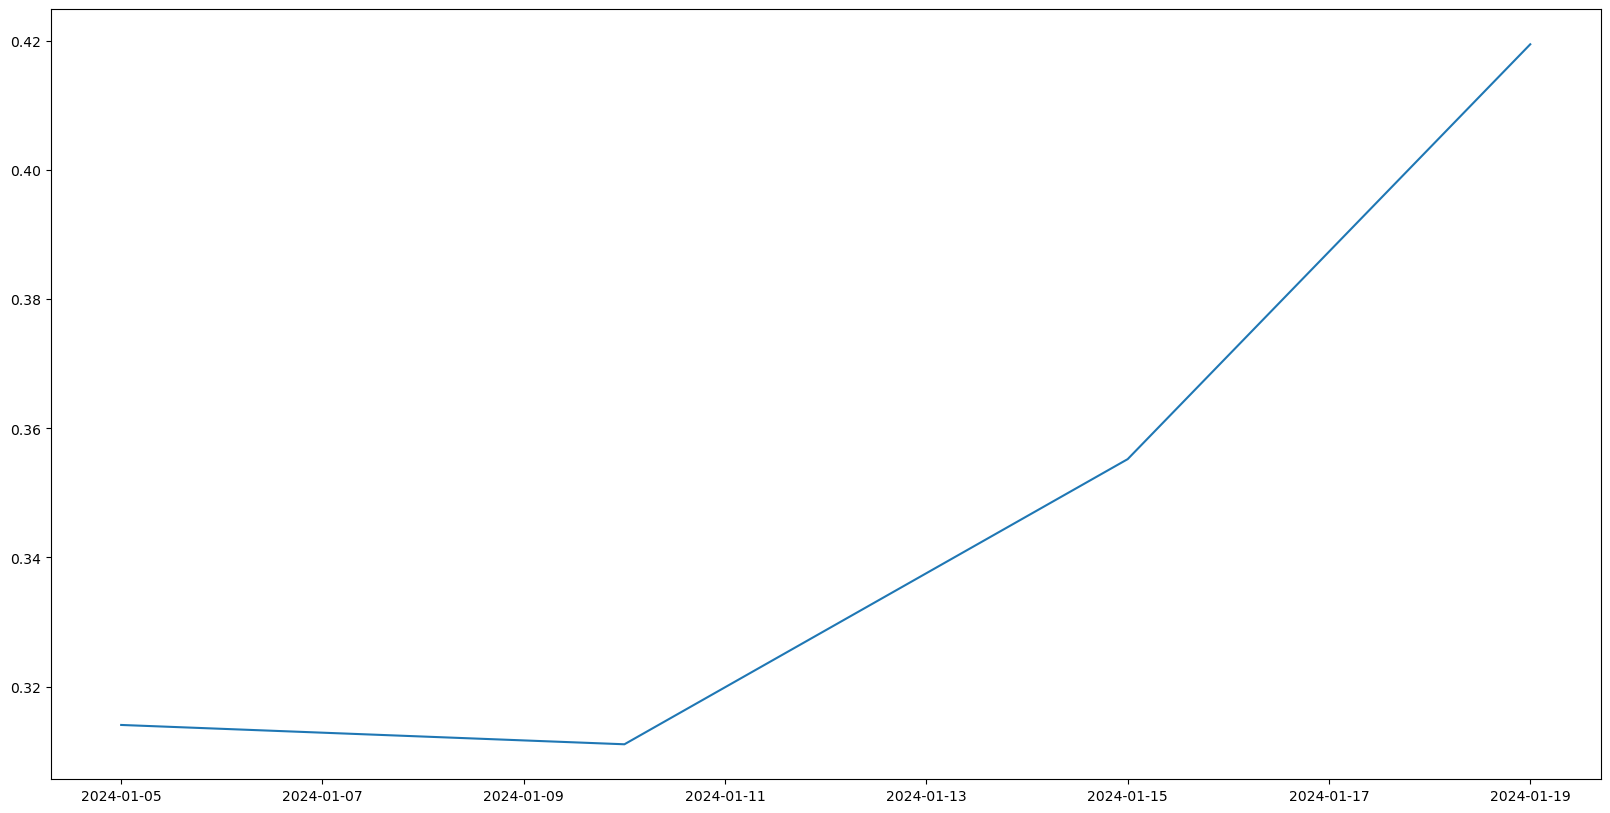

In [26]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.signal import find_peaks

x = spatial_mean.CHL
y = spatial_mean.time
peaks, _ = find_peaks(x, distance=10)

np.diff(peaks)
plt.figure(figsize=(20,10))
#spatial_mean.CHL.plot.line(x='time', color = "blue")
plt.plot(y,x)
plt.plot(y[peaks], x[peaks], "x")

plt.show()

In [ ]:
max_lat = data_mindelo.iloc[0,2]
min_lat = data_mindelo.iloc[0,3]

In [ ]:
lat_range_north = (data_mindelo.iloc[0,2], data_mindelo.iloc[0,4])
long_range_north = (data_mindelo.iloc[0,1], data_mindelo.iloc[0,3])
time_range = ("2023-01-01", "2024-03-01")

In [ ]:
capeverde_north = ds_coarse.sel(latitude=slice(*lat_range_north), longitude=slice(*long_range_north))
capeverde_north = ds_coarse.sel(time = slice(*time_range))
spatial_mean = capeverde_data.mean(dim=['latitude', 'longitude'])
    
    # Plot the spatial mean against time
spatial_mean.CHL.plot.line(x='time', color = "blue")
    
    # Add plot labels and title
plt.xlabel('Time')
plt.ylabel('north')
plt.title('Spatial Mean of CHL for Cape Verde')
    
    # Show the plot
plt.show()

In [ ]:
lat_range_east = (data_mindelo.iloc[1,2], data_mindelo.iloc[1,4])
long_range_east = (data_mindelo.iloc[1,1], data_mindelo.iloc[1,3])
time_range = ("2023-01-01", "2024-03-01")

In [ ]:
capeverde_north = ds_coarse.sel(latitude=slice(*lat_range_east), longitude=slice(*long_range_east))
capeverde_north = ds_coarse.sel(time = slice(*time_range))
spatial_mean = capeverde_data.mean(dim=['latitude', 'longitude'])
    
    # Plot the spatial mean against time
spatial_mean.CHL.plot.line(x='time', color = "red")
    
    # Add plot labels and title
plt.xlabel('Time')
plt.ylabel('north')
plt.title('Spatial Mean of CHL for Cape Verde')
    
    # Show the plot
plt.show()

In [ ]:
lat_range_east = (data_mindelo.iloc[1,2], data_mindelo.iloc[1,4])
long_range_east = (data_mindelo.iloc[1,1], data_mindelo.iloc[1,3])
time_range = ("2023-01-01", "2024-03-01")
(
    ds_coarse
    #.sel(depth=slice(10, 50)).mean("depth")
    .sel(time="2022-01-13")#(time>="2024-01-09" and time<="2024-01-11").mean()
    .sel(latitude=slice(*lat_range_east), longitude=slice(*long_range_east))
    .CHL
    .plot(
        x="longitude", y="latitude",
        #cmap=cmocean.cm.thermal,
        size=10,
    )
)